## Assignment Week 5

This week we are using numpy and matplotlib

In [4]:
# Start by loading the relevant libraries
import numpy as np

### Numpy: Magic Square

A <A HREF="https://en.wikipedia.org/wiki/Magic_square">magic square</A> is a matrix in which the sum of all rows, columns and diagonals are the same.
You can verify this fact for the matrix below by:
  * calculating an array containing the sums of all rows
  * calculate the minimum and maximum of this array
  * calculating an array containing the sum of all columns
  * calculate the minimum and maximum of this array
  * calculating the sum of both diagonals
  * check that both minimums and maximums and diagonals are the same value.

```python
msquare = np.array([
    [17, 24,  1,  8, 15],
    [23,  5,  7, 14, 16],
    [ 4,  6, 13, 20, 22],
    [10, 12, 19, 21,  3],
    [11, 18, 25,  2,  9]])
```

**Assignment 5.1**

Write a function **is_magic_square()** that takes a matrix as input and returns **True** if the matrix is a magic square and **False** otherwise. Use the matrix above to test your function.

*Hint*: Use np.diag and np.fliplr to get the diagonals of a matrix.


In [6]:
# Your code goes here
msquare = np.array([
    [17, 24,  1,  8, 15],
    [23,  5,  7, 14, 16],
    [ 4,  6, 13, 20, 22],
    [10, 12, 19, 21,  3],
    [11, 18, 25,  2,  9]])

cumsum_col=msquare.cumsum(axis=0)
cumsum_row=msquare.cumsum(axis=1)

print(cumsum_col)
print(cumsum_row)

np.any(msquare)

[[17 24  1  8 15]
 [40 29  8 22 31]
 [44 35 21 42 53]
 [54 47 40 63 56]
 [65 65 65 65 65]]
[[17 41 42 50 65]
 [23 28 35 49 65]
 [ 4 10 23 43 65]
 [10 22 41 62 65]
 [11 29 54 56 65]]


True

### Generating Magic Squares

The above function can be used in a (crude) method to generate magic squares

**Assignment 5.2**

Write a function **generateMagicSquare()** that generates a 3x3 magic square (containing numbers 1...9). 

Use the following algorithm:

  * Use the function **is_magic_square()** from the previous question to check if a matrix is a valid magic square or not.
  * Generate random 3x3 squares filled with the exact numbers 1..9 in some order and check if that matrix is a magic square. If so, print the magic square.
  
  * You may need to generate 100,000 matrices to find one that is a magic square (by chance).
  
*Hint*: Use np.random.permutation to generate a random permutation of an array.

In [ ]:
# Your code goes here

### Matplotlib: Functions

In [2]:
# Also make sure that you have the correct libraries loaded here

%matplotlib inline

import matplotlib.pyplot as plt

### More grading

This question continues from the exercise made in class (see file 'Week5_numpy_class.ipynb' and 'Week5_numpy_class-s.ipynb'). We quickly recreate the dataset here, see the aforementioned files for details.



In [6]:
# create students and grades arrays, using random grades
students = np.array(['Anne', 'Bob', 'Mary', 'John', 'Julia', 'Mike', 'Susan', 'Zach'])
grades = np.random.rand( 8,20 )* 6 + 4

# create an array with the average grades per student 
avg_grades = grades.mean(axis=1)

# create a masked array where we mask away all grades below 5.8
masked_grades = np.ma.masked_array( grades, grades < 5.8 )

# calculate the averages per student
avg_grades = masked_grades.mean( axis = 1 ) 

# print the array to see what we have
avg_grades

masked_array(data = [7.97729260812136 7.888258595566496 7.6362772084040005 7.332083312765506
 7.9203069232169465 7.490149449919317 8.073515790210136 7.886915120493899],
             mask = [False False False False False False False False],
       fill_value = 1e+20)

 **Assignment 5.3**

Using the above data, do the following:

  1. Plot the avarage grade per student in a bar chart, set the axis and labels accordingly.
  2. Plot the average grades for each of the 20 assignments.
  3. Try to fit a line to this line and try to predict the average grades for the next assignment. Plot the result.
     
     *Hint* Use np.polyfit() to find a fitting function. Use np.polyval() to evaluate a polynomial. How does the degree of the polynomial effect the fitting?

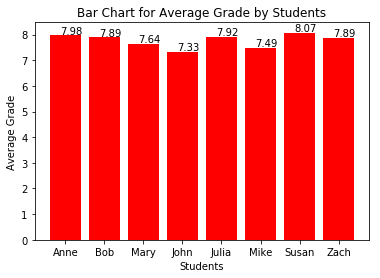

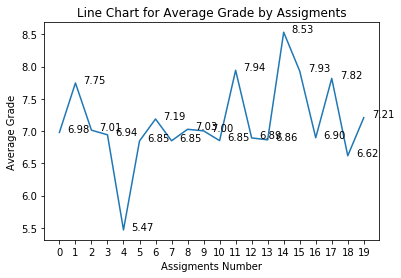

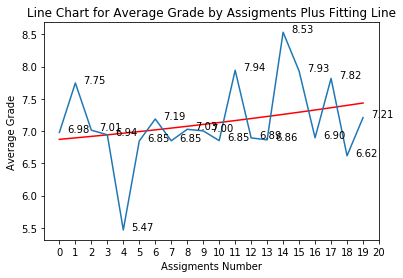

In [74]:
# Your code goes here

# Graph for Average Grade by Students

plt.bar( np.arange( avg_grades.shape[0]), avg_grades, align='center', color='red' )
plt.xticks( np.arange( len(students) ), students)
plt.xlabel("Students")
plt.ylabel("Average Grade")
for (i, grade) in enumerate(avg_grades):
    plt.text( i - 0.13, grade + 0.05, "%.2f" % (grade) )    
plt.title("Bar Chart for Average Grade by Students")
plt.show()

# Graph for Average Grade by Assigments

plt.plot( grades.mean(axis=0))
plt.xticks(np.arange( grades.shape[1]))
plt.xlabel("Assigments Number")
plt.ylabel("Average Grade")
for (i, grade) in enumerate(grades.mean(axis=0)):
    plt.text( i + 0.5, grade, "%.2f" % (grade) )

plt.title("Line Chart for Average Grade by Assigments")
plt.show()

# Graph for Average Grade by Assigments Plus Fitting Line

fit = np.polyfit(np.arange(grades.shape[1]),grades.mean(axis=0),deg=2)
ffit= np.polyval(fit,np.arange(grades.shape[1]))
plt.plot(np.arange(grades.shape[1]),ffit,color='red')
plt.plot( grades.mean(axis=0))
plt.xticks(np.arange( grades.shape[1]+1))
plt.xlabel("Assigments Number")
plt.ylabel("Average Grade")
for (i, grade) in enumerate(grades.mean(axis=0)):
    plt.text( i + 0.5, grade, "%.2f" % (grade) )    
plt.title("Line Chart for Average Grade by Assigments Plus Fitting Line")
plt.show()